<a href="https://colab.research.google.com/github/AlineFiori/MVP-Machine_Learning/blob/main/Template_Ana%CC%81lise_de_Dados_Pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Aline Fiori Gonçalves

**Matrícula:** 4052025000106

**Dataset:** [Pregnancy](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data?resource=download)

# 1. Descrição do Problema

O conjunto de dados 'Pregnancy' foi compilado com o objetivo de identificar características de saúde em mulheres gestantes que possam indicar risco à gestação. Nele, é possível analisar aspectos cruciais como idade gestacional, pressão arterial, glicemia, frequência cardíaca e a classificação de risco gestacional associada, entre outros.

## 1.1 Hipóteses do Problema

Em relação a idade gestacional 35+ (gestante com 35 anos ou mais):

- Qual o percentual deste grupo de risco na amostra avaliada?

- Qual o percentual de gestação de alto risco?

- Qual a correlação entre a idade materna e o risco gestacional?

## 1.2 Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade gestacional, pressáo arterial, glicemia e frequencia cardiaca), o objetivo é prever a qual o risco gestacional.

## 1.3 Atributos do Dataset

O dataset Pregnancy contém, originalmente, 1.014 amostras, 07 colunas, e 03 classificações diferentes de risco gestacional.

Possui cinco atributos:

- ***Age*** (idade em anos da gestante)
- ***SystolicBP*** (valor máximo da pressão arterial em mmHg)
- ***DiastolicBP*** (valor mínimo da pressão arterial em mmHg)
- ***BS (Blood Glicose)*** (níveis de glicose no sangue em termos de concentração molar, mmol/L)
- ***BodyTemp*** (temperatura corporal em Fahrenheit)
- ***HeartRate*** (frequência cardíaca normal em repouso, em batimentos por minuto)
- ***Risk Level*** (nível de intensidade de risco previsto durante a gravidez)

## 1.4 Seleção de Dados

Serão adicionadas duas colunas ao Dataset com a finalidade de refinar a análise dos dados, são elas:
- Idade_35+: classificação da idade gestacional em 1 (>=35) ou 0 (<35)
- Nivel_Risco_Numerico: classificação do nível de risco em 2 (right risk), 1 (mid risk) e 0 (low risk).

# 2. Importação das Bibliotecas
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [49]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


# Importar bibliotecas
import pandas as pd #manipulação e análise de dados
import numpy as np #computação numérica e científica em Python
import matplotlib.pyplot as plt #plotagem e visualização de dados
import seaborn as sns #visualização de dados científicos
from sklearn.model_selection import train_test_split #utilizado na valiação de modelos de Machine Learning, divide o dataset em treino e teste
from sklearn.preprocessing import MinMaxScaler #para escalonamento de dados (normalização)
from sklearn.preprocessing import StandardScaler #para padronizacao de dados (média de 0 e desvio padrão de 1)


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ajustar hiperparametros
from sklearn.model_selection import GridSearchCV # Importação adicionada

#Visualizar arvore de decisao
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


#arrumar comentarios dos itens abaixo e ver o que precisa e o que pode tirar

#from sklearn.datasets import load_wine # para importar o dataset

#from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
#from sklearn.model_selection import cross_val_score # para executar a validação cruzada
#from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
#from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
#from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
#from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
#from sklearn.svm import SVC # algoritmo SVM

# 3. Importação do Dataset

Esta seção consolida todas as etapas de carregamento inicial do dataset Pregnancy.

In [ ]:
# 1. Link do GitHub em que o dataset 'Pregnancy' está salvo
url_github = 'https://github.com/AlineFiori/MVP/raw/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv.xls'

In [ ]:
# 2. Carregar os dados da url para um data frame pandas
Dataset = pd.read_csv(url_github)

In [ ]:
# 3. Primeiras linhas
Dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# 4. Análise Exploratória de Dados

O objetivo desta etapa é entender a estrutura do dataset, identificar padrões, entender as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## 4.1 Estrutura do Dataset

Etapa de configuracão e adequação dos dados, crucial para os próximos passos de analise de dados e Machine Learning. Tem por objetivo verificar:

- Qualidade do Modelo: Modelos de Machine Learning são tão bons quanto os dados com os quais são treinados. Dados mal configurados, com erros, inconsistências ou em formatos inadequados, levarão a modelos com desempenho ruim, previsões imprecisas e decisões erradas.
- Interpretabilidade: Dados bem estruturados e limpos facilitam a compreensão dos padrões e a interpretação dos resultados da análise.
- Eficiência: Trabalhar com dados limpos e adequados torna o processo de desenvolvimento e teste muito mais eficiente, economizando tempo e recursos.
- Consistência: Garante que os dados estejam em um formato consistente para que as ferramentas e algoritmos possam processá-los corretamente.

In [ ]:
# 1. Renomear colunas para facilitar o uso
colunas_para_renomear = {
    'Age': 'Idade',
    'SystolicBP': 'Pressao_Sistolica',
    'DiastolicBP': 'Pressao_Diastolica',
    'BS': 'Nivel_Glicose',
    'BodyTemp': 'Temperatura_Corporal',
    'HeartRate': 'Frequencia_Cardiaca',
    'RiskLevel': 'Nivel_Risco'}


Dataset = Dataset.rename(columns=colunas_para_renomear)

print("\nBase com colunas renomeadas - Primeiras 5 linhas:")
print(Dataset.head())


Base com colunas renomeadas - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  
0                  98.0                   86   high risk  
1                  98.0                   70   high risk  
2                 100.0                   80   high risk  
3                  98.0                   70   high risk  
4                  98.0                   76    low risk  


In [ ]:
# 2. Criar nova coluna 'Idade_35+' para classificar a idade gestacional
# np.where(condição, valor_se_verdadeiro, valor_se_falso)
Dataset['Idade_35+'] = np.where(Dataset['Idade'] >= 35, 1, 0) # 1 para >=35 anos, 0 para <35 anos

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  
0                  98.0                   86   high risk          0  
1                  98.0                   70   high risk          1  
2                 100.0                   80   high risk          0  
3                  98.0                   70   high risk          0  
4                  98.0                   76    low risk          1  


In [ ]:
# 3. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco para classificá-los na sequencia
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
['high risk' 'low risk' 'mid risk']


In [ ]:
# 4. Criar nova coluna 'Nivel_Risco_Numerico' para classificar o nível de risco

def mapear_nivel_risco_para_numerico(row):
    if row['Nivel_Risco'] == 'high risk':
        return 2
    elif row['Nivel_Risco'] == 'mid risk':
        return 1
    elif row['Nivel_Risco'] == 'low risk': # Correção da sintaxe aqui
        return 0
    else: # Para qualquer outro valor inesperado
        return np.nan # Retorna Not a Number para valores não mapeados

# Aplicar a função ao DataFrame e atribuir à nova coluna 'Nivel_Risco_Numerico'
Dataset['Nivel_Risco_Numerico'] = Dataset.apply(mapear_nivel_risco_para_numerico, axis=1)

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  \
0                  98.0                   86   high risk          0   
1                  98.0                   70   high risk          1   
2                 100.0                   80   high risk          0   
3                  98.0                   70   high risk          0   
4                  98.0                   76    low risk          1   

   Nivel_Risco_Numerico  
0                     2  
1                     2  
2                     2  
3                     2  
4 

In [ ]:
# 5. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco_Numerico para checar o resultado da classificação
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco_Numerico'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
[2 0 1]


In [ ]:
# 6. Visão geral: total de linhas e colunas
print(f"Total de instâncias (linhas): {len(Dataset)}")
print(f"Total de colunas: {len(Dataset.columns)}")

Total de instâncias (linhas): 1014
Total de colunas: 9


In [ ]:
# 7. Análise de tipos de dados e valores nao nulos
print("\nInformações sobre os tipos de dados e valores não nulos")
Dataset.info()


Informações sobre os tipos de dados e valores não nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1014 non-null   int64  
 1   Pressao_Sistolica     1014 non-null   int64  
 2   Pressao_Diastolica    1014 non-null   int64  
 3   Nivel_Glicose         1014 non-null   float64
 4   Temperatura_Corporal  1014 non-null   float64
 5   Frequencia_Cardiaca   1014 non-null   int64  
 6   Nivel_Risco           1014 non-null   object 
 7   Idade_35+             1014 non-null   int64  
 8   Nivel_Risco_Numerico  1014 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 71.4+ KB


In [ ]:
# 8. Verificação de valores ausentes
print("\nVerificação de Valores Ausentes")
print(Dataset.isnull().sum())


Verificação de Valores Ausentes
Idade                   0
Pressao_Sistolica       0
Pressao_Diastolica      0
Nivel_Glicose           0
Temperatura_Corporal    0
Frequencia_Cardiaca     0
Nivel_Risco             0
Idade_35+               0
Nivel_Risco_Numerico    0
dtype: int64


## 4.2 Estatística Descritiva

A etapa de estatística descritiva serve para resumir e organizar os principais aspectos de um conjunto de dados, tornando-o mais compreensível.

- Identificar Problemas e Anomalias: Ajuda a detectar valores discrepantes (outliers), erros de entrada, distribuições inesperadas (muito concentradas ou muito espalhadas) ou dados ausentes que precisam ser tratados.

- Informar Próximos Passos: As descobertas da estatística descritiva guiam as decisões nas etapas futuras, como:

  Qual tipo de pré-processamento usar (padronização, normalização).

  Como lidar com valores ausentes ou extremos.

  Quais transformações podem ser necessárias para certas variáveis.

- Obter Insights Iniciais: Permite identificar tendências, padrões ou relações preliminares entre as variáveis antes de aplicar modelos mais complexos.

- Comunicar Características dos Dados: Facilita a comunicação das propriedades do dataset para outras pessoas, sem que elas precisem examinar cada ponto de dado individualmente.

Exemplos de estatísticas descritivas comuns:

- Medidas de Tendência Central: Média (valor médio), Mediana (valor do meio), Moda (valor mais frequente).

- Medidas de Dispersão: Desvio Padrão (quão espalhados os dados estão em relação à média), Variância, Amplitude (diferença entre máximo e mínimo).

- Medidas de Posição: Quartis (valores que dividem o dataset em quatro partes iguais), Mínimo e Máximo.

In [ ]:
# 1. Estatística Descritiva - Geral
print("\nEstatísticas descritivas das colunas numéricas")
print(Dataset.describe().T) # .T para transpor e facilitar a leitura, prefiro a visualização desta forma


Estatísticas descritivas das colunas numéricas
                       count        mean        std   min    25%    50%  \
Idade                 1014.0   29.871795  13.474386  10.0   19.0   26.0   
Pressao_Sistolica     1014.0  113.198225  18.403913  70.0  100.0  120.0   
Pressao_Diastolica    1014.0   76.460552  13.885796  49.0   65.0   80.0   
Nivel_Glicose         1014.0    8.725986   3.293532   6.0    6.9    7.5   
Temperatura_Corporal  1014.0   98.665089   1.371384  98.0   98.0   98.0   
Frequencia_Cardiaca   1014.0   74.301775   8.088702   7.0   70.0   76.0   
Idade_35+             1014.0    0.313609   0.464189   0.0    0.0    0.0   
Nivel_Risco_Numerico  1014.0    0.867850   0.807353   0.0    0.0    1.0   

                        75%    max  
Idade                  39.0   70.0  
Pressao_Sistolica     120.0  160.0  
Pressao_Diastolica     90.0  100.0  
Nivel_Glicose           8.0   19.0  
Temperatura_Corporal   98.0  103.0  
Frequencia_Cardiaca    80.0   90.0  
Idade_35+        

In [ ]:
# 2. Estatísticas descritivas agrupadas por tipo de risco
Dataset.groupby('Nivel_Risco').describe()

Idade                                                      \
             count       mean        std   min   25%   50%   75%   max   
Nivel_Risco                                                              
high risk    272.0  36.216912  13.032206  12.0  25.0  35.0  48.0  65.0   
low risk     406.0  26.869458  13.121661  10.0  17.0  22.0  32.0  70.0   
mid risk     336.0  28.363095  12.552660  10.0  19.0  25.0  32.0  60.0   

            Pressao_Sistolica              ... Idade_35+       \
                        count        mean  ...       75%  max   
Nivel_Risco                                ...                  
high risk               272.0  124.194853  ...       1.0  1.0   
low risk                406.0  105.866995  ...       0.0  1.0   
mid risk                336.0  113.154762  ...       0.0  1.0   

            Nivel_Risco_Numerico                                     
                           count mean  std  min  25%  50%  75%  max  
Nivel_Risco                                                          
high risk                  272.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
low risk                   406.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mid risk                   336.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[3 rows x 64 columns]

**Descrição dos Campos de Estatística Descritiva**

count = contagem de registros do dataset

mean = média

std = desvio padrão

min = valor mínimo da categoria

25% = valor de 25% dos registros da categoria

75% = valor de 75% dos registros da categoria

max = valor máximo da categoria

In [ ]:
# 3. Calcular o % de gestantes com idade >= 35 anos

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter proporções
proportions_idade2 = Dataset['Idade_35+'].value_counts(normalize=True)

# Obter o percentual de '1' (gestantes com 35+ anos)
percent_idade2_equals_1 = proportions_idade2.get(1, 0) * 100 # .get(1, 0) para lidar se não houver '1's

print(f"Contagem de valores para 'Idade_35+':")
print(Dataset['Idade_35+'].value_counts())

print(f"\nPercentual de gestantes com 35 anos ou mais (Idade_35+ = 1): {percent_idade2_equals_1:.2f}%")

# Se quiser ver todas as proporções:
print("\nProporções de 'Idade_35+':")
print(proportions_idade2)

Contagem de valores para 'Idade_35+':
Idade_35+
0    696
1    318
Name: count, dtype: int64

Percentual de gestantes com 35 anos ou mais (Idade_35+ = 1): 31.36%

Proporções de 'Idade_35+':
Idade_35+
0    0.686391
1    0.313609
Name: proportion, dtype: float64


## 4.3 Análise de Variáveis Numéricas e Categóricas

A análise de variáveis numéricas e categóricas é fundamental para extrair insights iniciais, validar hipóteses e guiar as próximas etapas do desenvolvimento do projeto. Entender a natureza e o comportamento de cada tipo de variável permite construir uma base sólida para modelos mais complexos e decisões estratégicas.

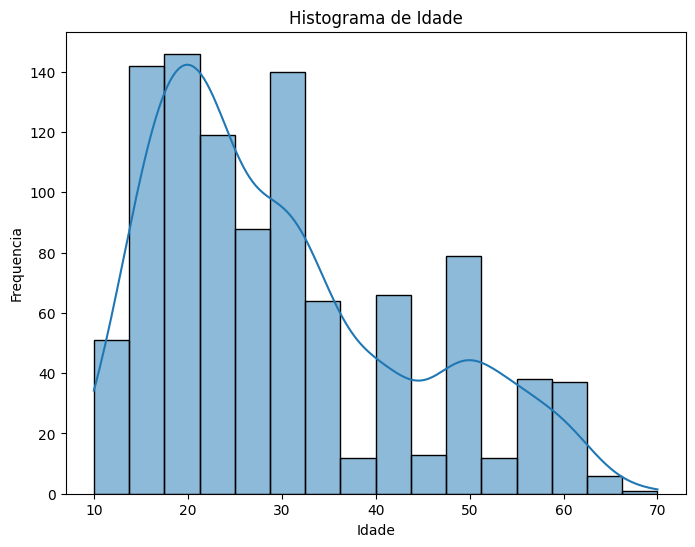

In [ ]:
# 1. Análise da frequencia de distribuição de idade no dataset

plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(Dataset['Idade'], kde=True)
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

**Gráfico: Histograma de Idade**

O gráfico mostra que há maior volume de dados de gestantes com idade inferior a 35 anos.

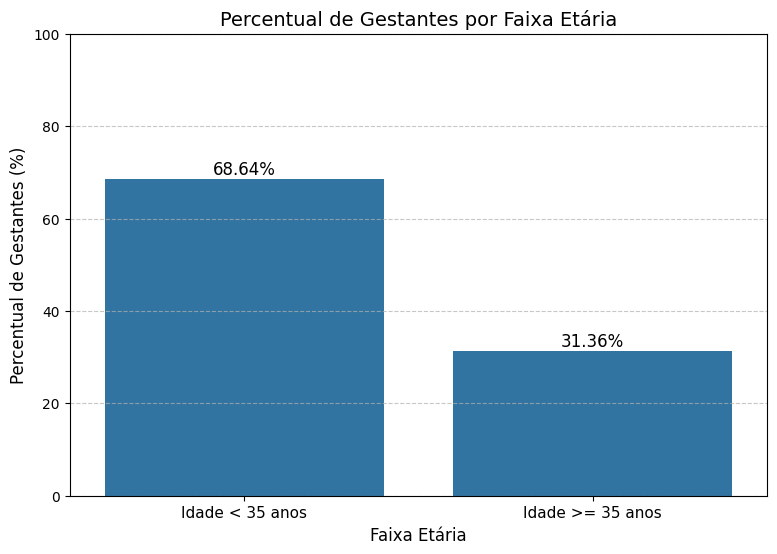

In [ ]:
# 2. Análise do % de idade gestacional 35+

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter percentuais
proportions_idade35_plus = Dataset['Idade_35+'].value_counts(normalize=True) * 100

# Preparar os dados para o gráfico de barras
plot_data = pd.DataFrame({
    'Grupo Idade': ['Idade < 35 anos', 'Idade >= 35 anos'], # Rótulos claros para o gráfico
    'Percentual': [proportions_idade35_plus.get(0, 0), proportions_idade35_plus.get(1, 0)]
})

# Criar o gráfico de barras
plt.figure(figsize=(9, 6)) # Aumentar ligeiramente o tamanho para melhor visualização
sns.barplot(x='Grupo Idade', y='Percentual', data=plot_data)
            #palette='viridis') # 'viridis' é uma boa paleta de cores

# Adicionar rótulos de percentual nas barras para clareza
for index, row in plot_data.iterrows():
    plt.text(index, row.Percentual, f'{row.Percentual:.2f}%',
             color='black', ha="center", va='bottom', fontsize=12)

plt.title('Percentual de Gestantes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Percentual de Gestantes (%)', fontsize=12)
plt.ylim(0, 100) # Garantir que o eixo Y vá de 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar grade para facilitar a leitura
plt.xticks(fontsize=11)

# Mostrar o gráfico
plt.show()

**Gráfico: Percentual de Gestantes por Faixa Etária**

Confirmando a análise do gráfico anterior, que evidencia que o maior volume de dados são de gestantes com idade inferior a 35 anos, do total de dados da base:
- 68,64% dos dados são de gestantes com idade inferior a 35 anos
- 31,36% dos dados são de gestantes com idade superior ou igual a 35 anos.

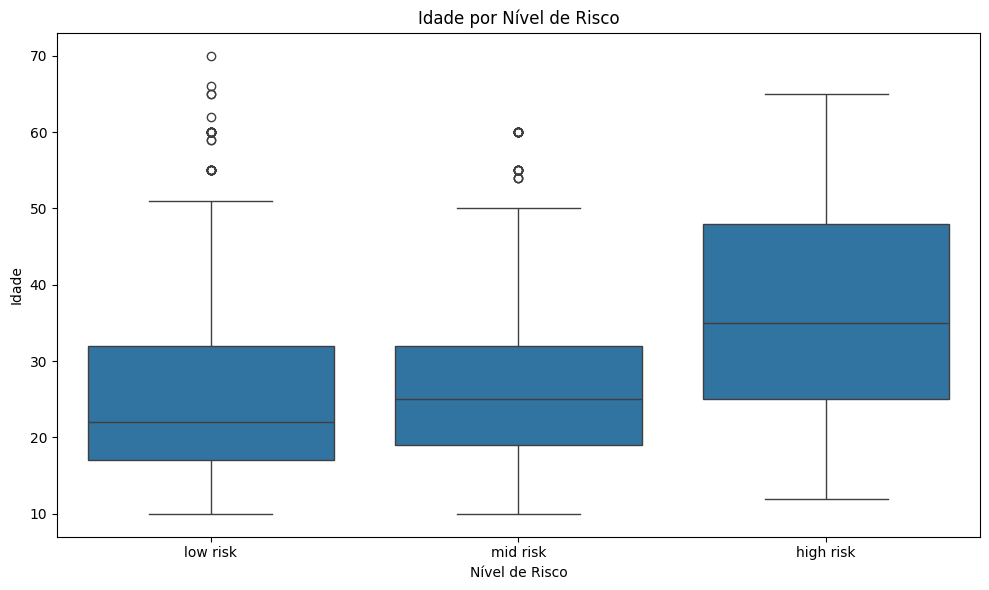

In [ ]:
# 3. Análise da idade em relação ao risco gestacional
# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nivel_Risco', y='Idade', data=Dataset, order=['low risk', 'mid risk', 'high risk'])

# Correcting the title and labels
plt.title('Idade por Nível de Risco')
plt.xlabel('Nível de Risco')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

**Gráfico: Idade por Nível de Risco**

Este gráfico demonstra que temos 03 categorias de risco:
- Low Risk
- Mid Risk
- High Risk

Sendo o maior risco gestacional (Hight Risk) concentrado em idades >= 35 anos.

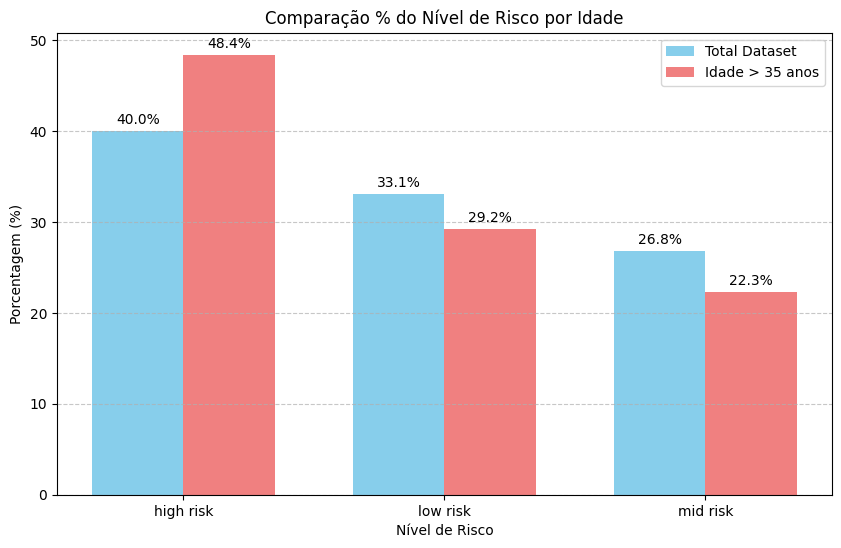

In [ ]:
# 4. Análise do % de nível de risco por idade

# Gráfico Barras

# 1. Calcular os percentuais para o dataset total
percent_total = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame para facilitar a manipulação
percent_total_df = percent_total.reset_index()
percent_total_df.columns = ['Nivel_Risco', 'Percentage']

# 2. Filtrar o DataFrame para idade maior que 35
df_age_gt_35 = Dataset[Dataset['Idade'] >= 35]

# 3. Calcular os percentuais para o dataset filtrado (idade > 35)
percent_age_gt_35 = df_age_gt_35['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame
percent_age_gt_35_df = percent_age_gt_35.reset_index()
percent_age_gt_35_df.columns = ['Nivel_Risco', 'Percentage']

# Obter os níveis de risco únicos para os rótulos do eixo X
risk_levels = sorted(percent_total_df['Nivel_Risco'].unique())

# Configurações para o gráfico
width = 0.35 # Largura das barras
x_pos = range(len(risk_levels)) # Posições para as barras no eixo X

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para o dataset total
bars_total = ax.bar([p - width/2 for p in x_pos], percent_total_df['Percentage'], width, label='Total Dataset', color='skyblue')

# Plotar as barras para o dataset filtrado (idade > 35)
bars_age_gt_35 = ax.bar([p + width/2 for p in x_pos], percent_age_gt_35_df['Percentage'], width, label='Idade > 35 anos', color='lightcoral')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Nível de Risco')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Comparação % do Nível de Risco por Idade')
ax.set_xticks(x_pos)
ax.set_xticklabels(risk_levels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_total)
autolabel(bars_age_gt_35)


# Mostrar o gráfico
plt.show()


**Gráfico: Comparação % do Nível de Risco por Idade**

Este gráfico de barras evidencia que temos 03 categorias de riscos:
- High Risk
- Mid Risk
- Low Risk

Sendo a categoria de maior risco (Righ Risk) a que tem maior quantidade de gestantes com idade >= 35 anos, representando 48,4%.

## 4.4 Matriz de Correlação

É uma ferramenta de suma importância, quase indispensável, para compreender as relações entre as variáveis numéricas do conjunto de dados. Ela serve como um mapa rápido e eficiente para identificar padrões, dependências e possíveis problemas antes de mergulhar em análises mais complexas ou na construção de modelos.As correlações positivas indicam que as variáveis tendem a se mover na mesma direção.

As correlações negativas indicam que elas tendem a se mover em direções opostas.

A força da correlação (o quão perto de 1 ou -1 o valor está) indica o quão forte é essa relação linear.

In [ ]:
# 1. Matriz de Correlação

# Definir colunas numéricas
numeric_cols = [
    'Idade',
    'Pressao_Sistolica',
    'Pressao_Diastolica',
    'Nivel_Glicose',
    'Temperatura_Corporal',
    'Frequencia_Cardiaca',
    'Idade_35+',
    'Nivel_Risco_Numerico'
]


# Calcular a matriz de correlação
matriz_correlacao = Dataset[numeric_cols].corr()

# Mostrar resultado da matriz de correlação
print("\n--- Matriz de Correlação das Características Numéricas ---")
print(matriz_correlacao)



--- Matriz de Correlação das Características Numéricas ---
                         Idade  Pressao_Sistolica  Pressao_Diastolica  \
Idade                 1.000000           0.416045            0.398026   
Pressao_Sistolica     0.416045           1.000000            0.787006   
Pressao_Diastolica    0.398026           0.787006            1.000000   
Nivel_Glicose         0.473284           0.425172            0.423824   
Temperatura_Corporal -0.255323          -0.286616           -0.257538   
Frequencia_Cardiaca   0.079798          -0.023108           -0.046151   
Idade_35+             0.858554           0.326090            0.347741   
Nivel_Risco_Numerico  0.267225           0.396473            0.346649   

                      Nivel_Glicose  Temperatura_Corporal  \
Idade                      0.473284             -0.255323   
Pressao_Sistolica          0.425172             -0.286616   
Pressao_Diastolica         0.423824             -0.257538   
Nivel_Glicose              1.000000   

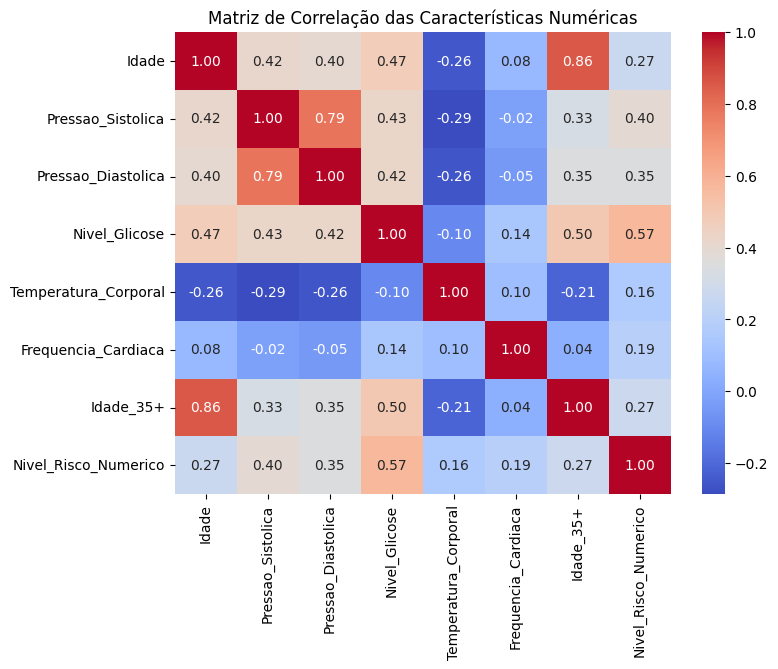

In [ ]:
# 2. Gerar e exibir o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

**Análise da Matriz de Correlação das Características Numéricas**

1. Aspectos mais relevantes da matriz:

- Nivel_Glicose (0.569942): Esta é a correlação positiva mais forte com o nível de risco. Indica que quanto maior o Nível de Glicose, maior o risco gestacional.

- Pressao_Sistolica (0.396473): Correlação positiva moderada. Indica que quanto maior a Pressão Sistólica, maior o risco gestacional.

- Pressao_Diastolica (0.346649): Correlação positiva moderada. Indica que quanto maior a Pressão Diastólica, maior o risco gestacional.

- Idade_35+ (0.271375): Correlação positiva moderada a fraca. Sugere que estar no grupo 35+ está associado a um maior risco gestacional, porém a idade deve ser associada a outros fatores para que aumente sua correlação

- Frequencia_Cardiaca (0.194312): Correlação positiva fraca. Sugere que uma Frequência Cardíaca mais alta está associada a um risco gestacional ligeiramente maior.

- Temperatura_Corporal (0.163984): Correlação positiva muito fraca. Indica uma associação muito branda entre temperatura corporal mais alta e maior risco.


2. Correlação Entre as Features (Multicolinearidade):

- Idade e Idade_35+: 0.858554

- Pressao_Sistolica e Pressao_Diastolica: 0.787006

Estas são correlações muito fortes e positivas. Em alguns modelos (como regressão linear), deve ser levado em consideração usar apenas uma delas para evitar redundância, mas em outros (como Random Forests), isso é menos problemático.


Matriz de Correlação para Idade >= 35 e Risco Gestacional:
                         Idade  Nivel_Risco_Numerico
Idade                 1.000000             -0.117465
Nivel_Risco_Numerico -0.117465              1.000000


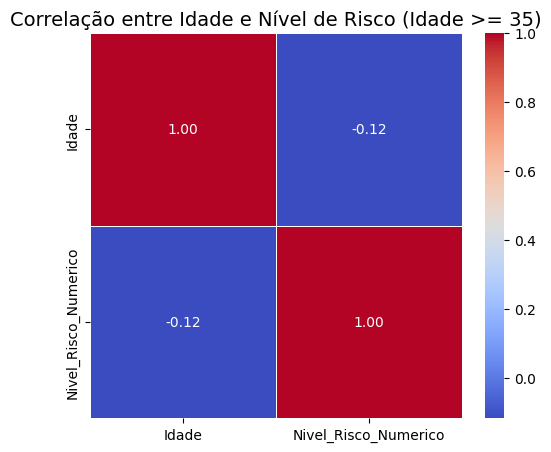

In [ ]:
# 3. Matriz de correlação de idade x risco gestacional

# Filtrar o DataFrame para incluir apenas pessoas com idade maior ou igual a 35
df_idade_maior_35 = Dataset[Dataset['Idade'] >= 35].copy() # .copy() para evitar SettingWithCopyWarning

# Selecionar as colunas para a matriz de correlação
colunas_para_correlacao_df = df_idade_maior_35[['Idade', 'Nivel_Risco_Numerico']]

# Calcular a matriz de correlação
matriz_correlacao_idade_risco = colunas_para_correlacao_df.corr()

print("\nMatriz de Correlação para Idade >= 35 e Risco Gestacional:")
print(matriz_correlacao_idade_risco)

# --- Gerar o Heatmap da Matriz de Correlação ---
plt.figure(figsize=(6, 5)) # Define o tamanho da figura
sns.heatmap(matriz_correlacao_idade_risco,
            annot=True,      # Mostra os valores de correlação no mapa
            cmap='coolwarm', # Escolhe um mapa de cores (coolwarm é bom para correlação)
            fmt=".2f",       # Formato dos números (2 casas decimais)
            linewidths=.5)   # Largura das linhas entre as células

plt.title('Correlação entre Idade e Nível de Risco (Idade >= 35)', fontsize=14)
plt.show()

**Análise da Matriz de Correlação Idade 35+ e Risco Gestacional**

Essa matriz mostra uma correlação fraca entre idade gestacional 35+ e risco gestacional. Com isso é possível inferir que apesar de a idade gestacional ser um fator importante, ela precisa ser associada a outros fatores de saúde para determinar o risco gestacional.

# 5. Machine Learning

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, ou seja, transformar os dados brutos em um formato adequado para algoritmos de aprendizado de máquina, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## 5.1 Treino e Teste

Esta etapa consiste em separar o dataset em duas partes, sendo um conjunto de treino e outro de teste.

- O conjunto de treino é usado para "ensinar" o        modelo a encontrar padrões nos dados.
- O conjunto de teste é um conjunto de dados "invisível" que o modelo nunca viu durante o treinamento. Ele é usado para simular como o      modelo se comportaria com novos dados do mundo real, dando uma estimativa imparcial de sua capacidade de generalização.

In [ ]:
# 1. Separar features (X) e target (y)
# Colunas que serão as features (X) - Excluímos 'Nivel_Risco' (string) e 'Nivel_Risco_Numerico' (o target)
features = [
    'Idade', 'Pressao_Sistolica', 'Pressao_Diastolica',
    'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca',
    'Idade_35+' # Inclui a nova feature numérica
]
X = Dataset[features] # Features
y = Dataset['Nivel_Risco_Numerico'] # Target

print(f"\nDimensão de X (features): {X.shape}")
print(f"Dimensão de y (target): {y.shape}")



Dimensão de X (features): (1014, 7)
Dimensão de y (target): (1014,)


In [ ]:
# 2. Dividir os dados em conjuntos de treino e teste

# - Train_test_split(...): Esta é a função que faz a divisão:
# - X, y: São os dados de entrada e a variável alvo.
# - Test_size=0.3: Define que 30% dos dados serão usados para o conjunto de teste e os 70% restantes para o conjunto de treino.
# - Random_state=42: garante que a divisão seja a mesma toda vez que você rodar o código.
    #Isso é crucial para a reprodutibilidade dos seus experimentos.
# - Stratify=y: é crucial para problemas de classificação, garantindo que as proporções de cada
    # nível de risco (neste caso, 'low risk', 'mid risk', 'high risk') sejam mantidas nos conjuntos de treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 3. Imprimir as dimensões dos conjuntos para verificar
print(f"Dimensão total do Dataset: {Dataset.shape}")
print(f"Dimensão de X (features): {X.shape}")
print(f"Dimensão de y (target): {y.shape}")
print("-" * 40)
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do target de treino (y_train): {y_train.shape}")
print(f"Dimensão do target de teste (y_test): {y_test.shape}")
print("-" * 40)
print("Distribuição do Nivel_Risco no Dataset original:")
print(y.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Dimensão total do Dataset: (1014, 9)
Dimensão de X (features): (1014, 7)
Dimensão de y (target): (1014,)
----------------------------------------
Dimensão do conjunto de treino (X_train): (709, 7)
Dimensão do conjunto de teste (X_test): (305, 7)
Dimensão do target de treino (y_train): (709,)
Dimensão do target de teste (y_test): (305,)
----------------------------------------
Distribuição do Nivel_Risco no Dataset original:
Nivel_Risco_Numerico
0    0.400394
1    0.331361
2    0.268245
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de treino:
Nivel_Risco_Numerico
0    0.407616
1    0.315938
2    0.276446
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de teste:
Nivel_Risco_Numerico
0    0.383607
1    0.367213
2    0.249180
Name: proportion, dtype: float64


**Análise do Resultado de Treino e Teste**

1. Dimensões do Dataset (Total e Separado):

- Dimensão total do Dataset: (1014, 9)
Confirma que, ao separar as variáveis independentes (features), você ficou com 1014 linhas e 8 colunas de características, o que é consistente (9 colunas totais - 1 coluna alvo = 8 features).


2. Dimensões do Conjunto de Treino e Teste:

- Conjunto de Treino (X_train, y_train): (709 linhas) - Representa aproximadamente 70% (709/1014 ≈ 0.699 ou 70%) dos seus dados, que serão usados para treinar o modelo.
- Conjunto de Teste (X_test, y_test): (305 linhas) - Representa aproximadamente 30% (305/1014 ≈ 0.300 ou 30%) dos seus dados, que serão usados para avaliar o desempenho do modelo em dados "novos" (não vistos durante o treino).
- Consistência: As dimensões de X_train e X_test (8 colunas) e y_train e y_test (séries unidimensionais) estão corretas e são consistentes com a separação inicial de features e target.


3. Distribuição do Nivel_Risco (Nivel_Risco_Numerico) nos Conjuntos:

- Dataset Original: 2 (righ risk): aproximadamente 40.04%, 1 (mid risk): aproximadamente 33.14% e 0 (low risk): aproximadamente 26.82%


- Conjunto de Treino: 2 (righ risk): aproximadamente 40.76%, 1 (mid risk): aproximadamente 31.59% e 0 (low risk): aproximadamente 40.04%


- Conjunto de Teste: 2 (righ risk): aproximadamente 38.36%, 1 (mid risk): aproximadamente 36.72% e 0 (right risk): aproximadamente 24.92%


- Qualidade da Divisão (Estratificação):
As proporções dos níveis de risco (0, 1 e 2) são razoavelmente semelhantes entre o dataset original, o conjunto de treino e o conjunto de teste. Há pequenas variações (por exemplo, 1 aumenta um pouco no teste, 0 diminui um pouco no teste), mas não são grandes o suficiente para serem alarmantes.
Isso indica que a divisão foi realizada de forma estratificada, o que é fundamental para garantir que cada subconjunto (treino e teste) tenha uma representação proporcional das classes da variável alvo. Isso é especialmente importante aqui, pois as classes não são uniformemente distribuídas. Uma boa estratificação ajuda a garantir que o modelo seja treinado e avaliado em uma amostra representativa de todas as categorias de risco.

## 5.2 Árvore de Decisão

Com os dados divididos, podemos criar o modelo de Árvore de Decisão, treiná-lo e fazer previsões.

In [40]:
# 1. Dividir os dados em conjuntos de treino e teste
# O 'random_state' garante que a divisão seja a mesma sempre que o código for executado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensão de X_train (treino): {X_train.shape}")
print(f"Dimensão de X_test (teste): {X_test.shape}")
print(f"Dimensão de y_train (treino): {y_train.shape}")
print(f"Dimensão de y_test (teste): {y_test.shape}")

# 2. Criar e treinar o modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred = tree_model.predict(X_test)

# 4. Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Desempenho do Modelo ---")
print(f"Acurácia: {accuracy:.4f}")

# Relatório de classificação detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Baixo Risco', 'Médio Risco', 'Alto Risco']))

Dimensão de X_train (treino): (811, 7)
Dimensão de X_test (teste): (203, 7)
Dimensão de y_train (treino): (811,)
Dimensão de y_test (teste): (203,)

--- Desempenho do Modelo ---
Acurácia: 0.7931

Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.85      0.71      0.78        80
 Médio Risco       0.73      0.84      0.78        76
  Alto Risco       0.83      0.85      0.84        47

    accuracy                           0.79       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.80      0.79      0.79       203



Interpretação do Desempenho do Modelo

Acurácia Geral: 0.7931

A acurácia de 79.31% significa que o seu modelo previu corretamente o nível de risco de saúde em cerca de 79.31% das pacientes no conjunto de teste. Isso é um resultado sólido para um primeiro modelo.

No entanto, a acurácia geral pode ser enganadora se o número de casos de cada classe for muito diferente (o que não parece ser o seu caso, já que as classes estão relativamente bem distribuídas). Por isso, o relatório de classificação é tão importante, pois ele detalha o desempenho para cada uma das classes ('Baixo Risco', 'Médio Risco', 'Alto Risco').

Análise por Classe (Precisão, Recall e F1-Score)

Baixo Risco:

Precisão (0.85): Das vezes que o modelo previu 'Baixo Risco', ele acertou 85% das vezes. Isso mostra que, quando o modelo faz essa previsão, ele é bastante confiável.

Recall (0.71): Dos pacientes que realmente tinham 'Baixo Risco', o modelo conseguiu identificar 71% deles. Isso significa que ele deixou de identificar 29% dos casos de baixo risco.

F1-Score (0.78): É uma média ponderada da Precisão e do Recall. Um F1-Score de 0.78 é um bom equilíbrio entre as duas métricas.

Médio Risco:

Precisão (0.73): Quando o modelo prevê 'Médio Risco', ele acerta 73% das vezes.

Recall (0.84): Das pacientes que realmente tinham 'Médio Risco', o modelo identificou 84% delas. Isso indica que o modelo é muito bom em capturar os casos de médio risco.

F1-Score (0.78): Assim como para 'Baixo Risco', o F1-Score de 0.78 indica um bom desempenho geral.

Alto Risco:

Precisão (0.83): Quando o modelo prevê 'Alto Risco', ele acerta 83% das vezes.

Recall (0.85): Das pacientes que realmente tinham 'Alto Risco', o modelo identificou 85% delas. Esta é a métrica mais importante para essa classe, pois indica que o modelo é muito bom em identificar pacientes de alto risco, o que é crucial em um contexto de saúde.

F1-Score (0.84): O F1-Score mais alto das três classes, mostrando um desempenho robusto na identificação de alto risco.

Resumo e Próximos Passos

O desempenho geral do modelo é bastante promissor. Ele está se saindo especialmente bem na detecção de casos de alto risco, o que é a prioridade em uma aplicação médica. No entanto, ainda há espaço para melhorias, principalmente no recall para a classe de 'Baixo Risco'.

Para aprimorar o modelo e talvez aumentar o desempenho geral, você pode:

Visualizar a Árvore de Decisão: Entender como a árvore toma as decisões pode revelar insights importantes e guiar a melhoria do modelo.

Ajustar Hiperparâmetros: Otimizar parâmetros como a profundidade máxima da árvore (max_depth) ou o número mínimo de amostras por folha (min_samples_leaf) pode reduzir o overfitting e melhorar a capacidade de generalização do modelo.

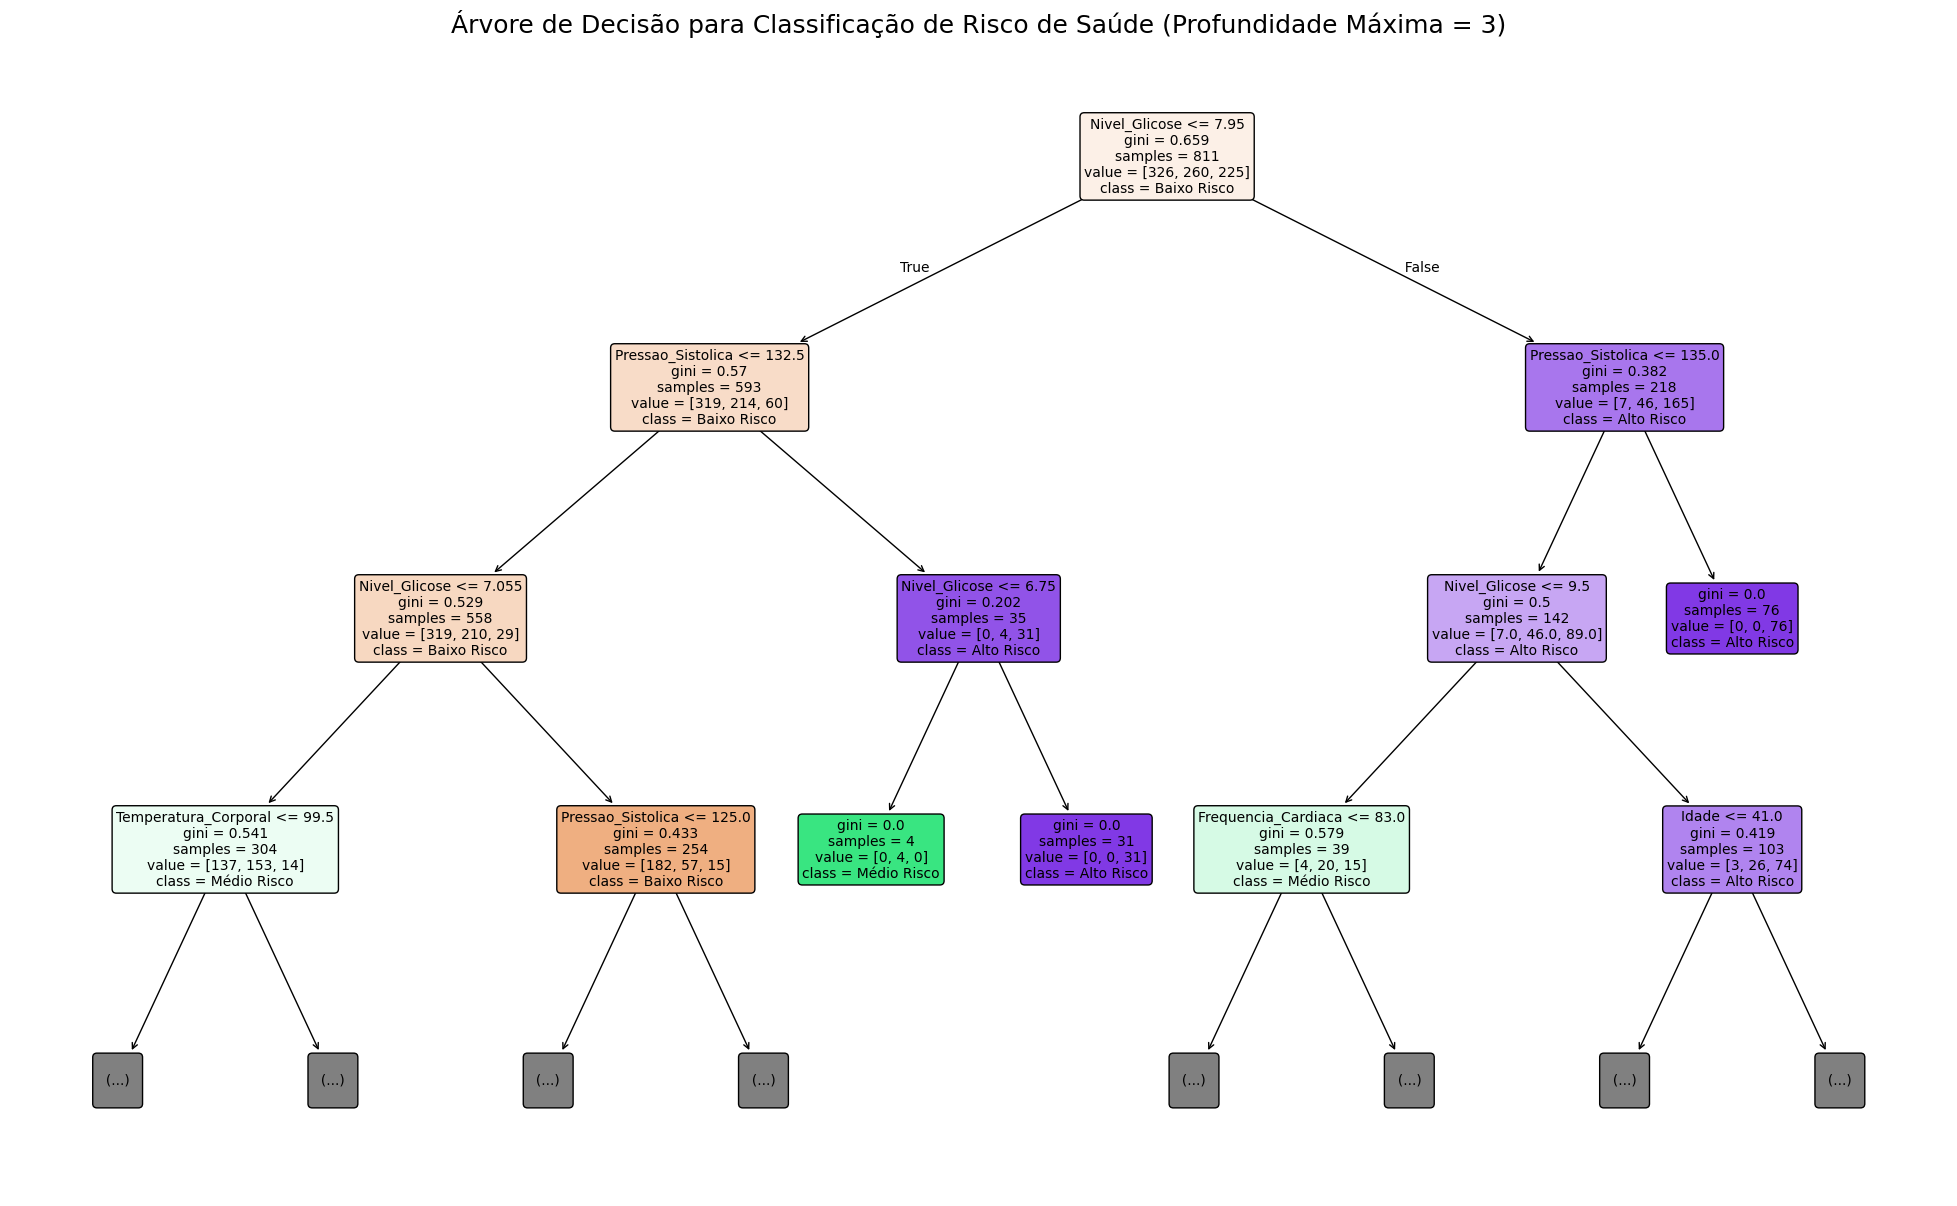

In [42]:
# A Árvore de Decisão já foi treinada como `tree_model`
# As features são as colunas de 'X', e os nomes das classes são os rótulos originais
feature_names = X.columns.tolist()
class_names = ['Baixo Risco', 'Médio Risco', 'Alto Risco']

plt.figure(figsize=(25, 15)) # Aumenta o tamanho da figura para melhor visualização

plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Limita a profundidade para facilitar a visualização
)

plt.title("Árvore de Decisão para Classificação de Risco de Saúde (Profundidade Máxima = 3)", fontsize=18)
plt.show()

Interpretação da Visualização

Ao executar o código, uma imagem da sua árvore será gerada. Cada nó (caixa) da árvore representa uma decisão baseada em uma feature.

Linha superior (e.g., feature <= X.X): Esta é a condição de divisão. Os dados que satisfazem a condição vão para o nó esquerdo, e os que não satisfazem, para o direito.

gini: O coeficiente de Gini mede a impureza do nó. Um valor de 0 significa que o nó é 100% puro (contém amostras de apenas uma classe). O algoritmo busca reduzir o Gini em cada divisão.

samples: O número de amostras (pacientes) que se enquadram naquele nó.

value: A contagem de amostras por classe naquele nó (e.g., [200, 150, 50] significa 200 amostras de baixo risco, 150 de médio, e 50 de alto).

class: A classe majoritária no nó. É a previsão que o modelo faria se chegasse a esse nó folha.

A visualização da árvore é uma ferramenta poderosa para entender as regras que o modelo aprendeu. Ao examiná-la, você pode identificar quais features são mais importantes para a classificação. Por exemplo, se a primeira divisão for baseada em 'Pressao_Sistolica', isso indica que essa feature é a mais relevante para diferenciar os grupos de risco.

####Ajustar hiperparametros
Ótima escolha! Ajustar os hiperparâmetros é um passo crucial para otimizar o desempenho do seu modelo. A Árvore de Decisão tem alguns hiperparâmetros importantes que podemos ajustar para evitar o "overfitting" (quando o modelo se encaixa muito bem nos dados de treino, mas não generaliza para novos dados) e melhorar a acurácia.

As duas técnicas mais comuns para isso são o Grid Search e o Random Search. O Grid Search testa todas as combinações de parâmetros que você define, enquanto o Random Search testa um número fixo de combinações aleatórias. Para começar, o Grid Search é mais direto e fácil de entender.

Vamos usar o Grid Search para encontrar a melhor combinação de hiperparâmetros para a sua Árvore de Decisão.




1. Definir o Espaço de Parâmetros

Primeiro, você precisa decidir quais hiperparâmetros você quer ajustar e quais valores você quer testar para cada um deles.

max_depth: A profundidade máxima da árvore. Se for muito grande, a árvore pode memorizar os dados de treino (overfitting).

min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Um valor alto pode evitar que o modelo aprenda detalhes específicos dos dados de treino.

criterion: A função para medir a qualidade da divisão. As opções são 'gini' ou 'entropy'.

Vamos criar um dicionário com os valores que queremos testar.

In [43]:
# Definir os hiperparâmetros e os valores a serem testados
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # None significa profundidade ilimitada
    'min_samples_split': [2, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

2. Executar o Grid Search

Agora, vamos criar uma instância do GridSearchCV. Ele fará o trabalho pesado de treinar e avaliar o modelo com cada combinação de parâmetros usando validação cruzada.

In [50]:
 # Criar o modelo base
tree_model = DecisionTreeClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5, # Usar 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1 # Usar todos os processadores
)

# Executar o Grid Search com os dados de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor acurácia
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print(f"\nMelhor acurácia (média da validação cruzada): {grid_search.best_score_:.4f}")

Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

Melhor acurácia (média da validação cruzada): 0.8225


3. Avaliar o Modelo com os Melhores Parâmetros

Após a execução do Grid Search, o objeto grid_search já contém o modelo final com os melhores parâmetros. Você pode usá-lo para fazer previsões e obter o relatório de classificação no conjunto de teste.

In [51]:
from sklearn.metrics import classification_report

# Usar o melhor modelo para fazer previsões no conjunto de teste
best_tree_model = grid_search.best_estimator_
y_pred_tuned = best_tree_model.predict(X_test)

# Avaliar o desempenho do modelo otimizado
print("\n--- Desempenho do Modelo Otimizado ---")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Acurácia: {accuracy_tuned:.4f}")

# Relatório de classificação detalhado
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_tuned, target_names=['Baixo Risco', 'Médio Risco', 'Alto Risco']))


--- Desempenho do Modelo Otimizado ---
Acurácia: 0.8030

Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

 Baixo Risco       0.84      0.74      0.79        80
 Médio Risco       0.74      0.84      0.79        76
  Alto Risco       0.87      0.85      0.86        47

    accuracy                           0.80       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



Ao executar este código, você poderá comparar o desempenho do modelo com os hiperparâmetros otimizados versus o modelo inicial. É provável que você veja uma pequena melhora na acurácia e, mais importante, no desempenho detalhado por classe.

O que os resultados mostraram? O modelo melhorou?

# 6. Conclusão Analise Exploratoria

O objetivo principal deste MVP foi explorar as características de saúde em mulheres gestantes para identificar indicadores de risco e preparar os dados para futuras etapas de modelagem preditiva. Através de diversas etapas de análise, insights importantes foram obtidos:

1. Preparação e Engenharia de Features:

- Enriquecimento do Dataset: A criação da coluna Idade_35+ foi uma decisão estratégica baseada em conhecimento de domínio médico, reconhecendo que a idade gestacional a partir de 35 anos é um fator de risco comprovado. Esta feature binária é um preditor valioso que captura uma relação não-linear com o risco.
- Codificação da Variável Alvo: A transformação da variável categórica Nivel_Risco em Nivel_Risco_Numerico (0=low risk, 1=mid risk, 2=high risk) foi uma etapa fundamental e necessária, convertendo os dados para um formato compreensível pelos algoritmos de Machine Learning.
- Padronização dos Dados: A aplicação do StandardScaler nos dados de treino garantiu que todas as features numéricas tivessem média zero e desvio padrão um. A análise confirmou que esta etapa foi executada corretamente, mantendo as relações intrínsecas entre as variáveis (evidenciado pela estabilidade da matriz de correlação) e preparando o dataset para modelos sensíveis à escala das features.


2. Análise de Correlação e Fatores de Risco:

A matriz de correlação revelou insights cruciais sobre a associação linear entre as características de saúde e o nível de risco gestacional:

- Principais Preditores de Risco: O Nível de Glicose demonstrou a associação positiva mais forte com o risco gestacional (0.5777), indicando que níveis mais altos de glicose estão fortemente ligados a um risco elevado. As Pressões Sistólica (0.3771) e Diastólica (0.3372) também se mostraram preditores importantes, com correlações positivas moderadas.
Impacto da Idade: Tanto a Idade (0.2919) quanto a Idade_35+ (0.2953) apresentaram correlações positivas moderadas com o nível de risco, confirmando que a idade é um fator relevante.
- Multicolinearidade: Foi identificada alta multicolinearidade entre Idade e Idade_35+ (0.8546), e entre Pressao_Sistolica e Pressao_Diastolica (0.7993). Embora isso não seja um problema para todos os modelos (ex: árvores de decisão), pode exigir atenção para modelos lineares, onde técnicas como PCA ou seleção de features podem ser consideradas.


3. Respostas às hipóteses levantadas, em relação a idade gestacional 35+ (gestante com 35 anos ou mais):


- Qual o percentual deste grupo de risco na amostra avaliada?
No dataset avaliado, 31,36%% das gestantes pertencem ao grupo de idade maior ou igual a 35 anos (Idade_35+). Este é um grupo significativo na amostra, o que sublinha a importância de analisar seus perfis de risco.

- Qual o percentual de gestação de alto risco? Dentro do nível de alto risco gestacional (righ risk), 48,4% são gestantes 35+. Um valor bastante significativo.

- Qual a correlação entre a idade materna e o risco gestacional? A correlação variou pouco entre os dados originais, normalizados e padronizados, como era esperado. Em todos eles a correlação se mostrou relativamente fraca a moderada. Isso significa que, à medida que a idade da gestante aumenta, há uma tendência de o risco gestacional também aumentar, embora a força da correlação sugere que a idade por si só não explica uma grande parte da variação no nível de risco, outros fatores também contribuem para aumentar o risco, como por exemplo, diabetes gestacional que possui correlação positiva mais forte com o nível de risco.



Próximos Passos:

Com os dados limpos, transformados e as relações iniciais compreendidas, o próximo passo lógico e crucial é a construção e avaliação de modelos de Machine Learning.
Este MVP estabeleceu uma base sólida e insights valiosos para o desenvolvimento de um sistema preditivo robusto para a avaliação de risco gestacional.